## Logistic Regression
- Data Preparation
- Visualisation
- Create Train and Test set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary
- How to use sk-learn

In [1]:
# Generate data using numpy
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


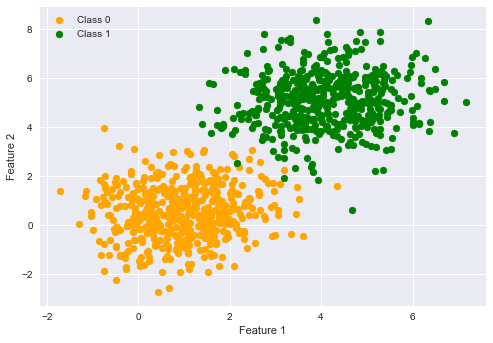

In [3]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color = 'orange',label = "Class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'green',label = "Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))

In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02

data[500:,2] = 1

In [6]:
# Randomly shuffle data
np.random.shuffle(data)
print(data[:10])

[[ 1.72325461  1.33227416  0.        ]
 [-0.49618027 -2.23809932  0.        ]
 [ 0.88492469 -0.92624766  0.        ]
 [ 4.25870157  5.40598191  1.        ]
 [ 4.88200647  7.19542845  1.        ]
 [ 1.90308782  0.54707692  0.        ]
 [ 0.68001123  0.69367467  0.        ]
 [ 0.69165521  2.50062665  0.        ]
 [ 1.54317328  2.3709326   0.        ]
 [ 4.02906365  5.59756894  1.        ]]


In [7]:
# Divide the data into test and train part
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
Y_train = data[:split,-1]

X_test = data[split:,:-1]
Y_test = data[split:,-1]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


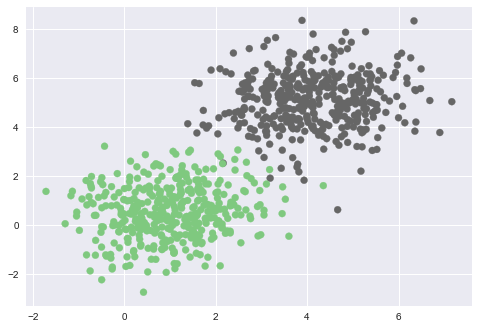

In [8]:
# Plot the training data and normalize it
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train,cmap = plt.cm.Accent)
plt.show()

In [9]:
# Data Normalization
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)
print(x_mean,x_std)

[2.577873   2.87173468] [1.86550667 2.53194296]


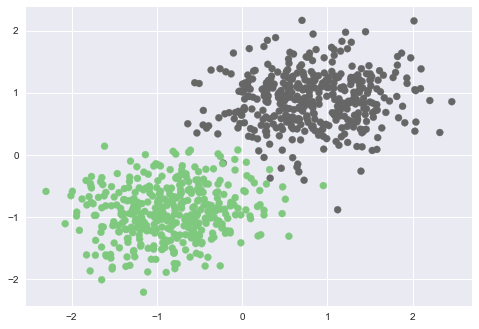

In [10]:
# Apply the transformation
X_train = (X_train-x_mean)/x_std

# Apply the same transformation to test set
X_test = (X_test-x_mean)/x_std

plt.scatter(X_train[:,0],X_train[:,1],c = Y_train,cmap = plt.cm.Accent)
plt.show()

## Logistic Regression Implementation

In [31]:
# learning algorithm should predict a hypothesis

def sigmoid(x):   # x is any real number and sigmoid converts it to a range of 0 to 1
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    '''
    Parameters -
        X - array of shape (m,n+1)
        theta - array of shape (n+1,1) for n feautures
    Returns a hypothesis vector of shape (m,1)
    '''
    return sigmoid(np.dot(X,theta))

# finding optimal value of theta by minimising error
def error(X,y,theta):  # loss is binary gross entropy loss
    '''
    Parameters -
        X (matrix) - array of shape (m,n+1)
        Y (vector) - array of shape (m,1)
        theta (vector) - array of shape (n+1,1)
    Returns a scalar value i.e. loss
    '''
    hi = hypothesis(X,theta)   # hypothesis vector for all the examples
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e

In [32]:
a = np.linspace(-10,10,20)

In [33]:
a

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

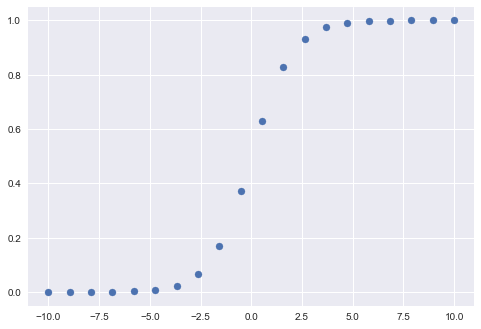

In [34]:
plt.scatter(a,sigmoid(a))
plt.show()

In [35]:
# gradient is also a vector
def gradient(X,y,theta):
    '''
    Parameters -
        X - array of shape (m,n+1)
        Y (vector) - array of shape (m,1)
        theta - array of shape (n+1,1) for n feautures
    Returns a gradient vector (containing partial derivatives of loss function) of shape (n+1,1)
    '''
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m

# gradient descent optimisation (reduce error to the minimun to get optimum values of theta)
def gradient_descent(X,y,lr=0.1,max_itrs=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itrs):    # applying the update
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        
        # update
        theta = theta - lr*grad   # - and - will become +
    
    return (theta,error_list)

In [36]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
print(X_new_train.shape)
print(X_new_train)
Y_train = Y_train.reshape((-1,1))

(800, 3)
[[ 1.         -0.45811597 -0.60801548]
 [ 1.         -1.64783827 -2.01814736]
 [ 1.         -0.90750054 -1.50002682]
 ...
 [ 1.         -1.06527196 -1.68742422]
 [ 1.         -0.70180942 -0.17880085]
 [ 1.         -1.03709489 -0.18407769]]


In [37]:
theta,error_list = gradient_descent(X_new_train,Y_train)

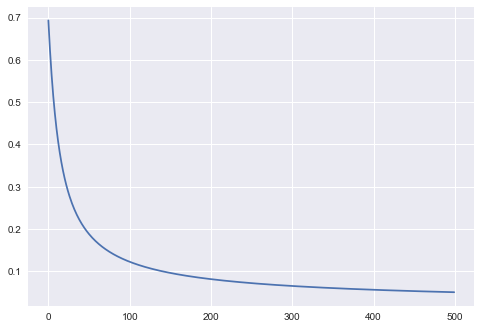

In [39]:
plt.plot(error_list)
plt.show()

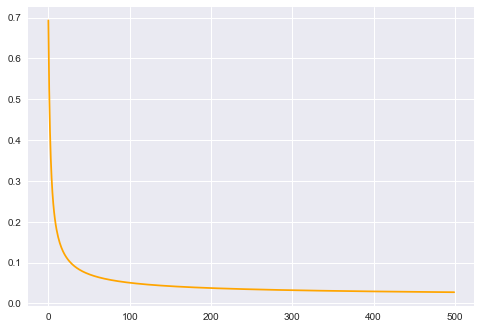

In [41]:
theta,error_list = gradient_descent(X_new_train,Y_train,0.5)
plt.plot(error_list,color = 'orange')
plt.show()

In [42]:
theta

array([[0.21966093],
       [3.17595691],
       [4.61262853]])

### Visualise Decision Surface

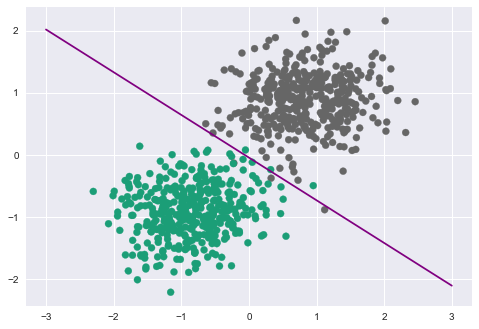

In [49]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train,cmap = plt.cm.Dark2)
x1 = np.arange(-3,4)
x2 = -(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2,color = 'purple')
plt.show()

### Predictions & Accuracy

In [50]:
ones = np.ones((X_test.shape[0],1))
X_new_test = np.hstack((ones,X_test))
print(X_new_test.shape)
print(X_new_test[:3,:])

(200, 3)
[[ 1.         -0.8832229  -0.85416682]
 [ 1.         -0.6094036  -0.87986823]
 [ 1.         -1.4067825  -0.46084212]]


In [51]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

In [53]:
XT_preds = predict(X_new_train,theta)
Xt_preds = predict(X_new_test,theta)
XT_preds.shape,Xt_preds.shape

((800, 1), (200, 1))

In [54]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    acc = np.sum(actual==preds)/actual.shape[0]
    return acc*100

In [56]:
Y_test = Y_test.reshape((-1,1))

In [57]:
train_acc = accuracy(Y_train,XT_preds)
test_acc = accuracy(Y_test,Xt_preds)
print(train_acc,test_acc)

99.25 100.0


## How to use Sk-learn?

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,Y_train)

C:\Users\DELL INDIA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [61]:
theta_0 = model.intercept_
theta_s = model.coef_

In [62]:
theta_0,theta_s

(array([0.23283472]), array([[2.9288103 , 4.45538798]]))

In [63]:
model.score(X_train,Y_train)

0.9925

In [64]:
model.score(X_test,Y_test)

1.0

In [65]:
y_pred = model.predict(X_test)

In [66]:
y_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [67]:
y_pred.shape

(200,)